Biblioteca para trtatar dados com dataframe

In [42]:
import pandas as pd

In [1]:
import pandas as pd


Biblioteca para uso de gráficos

In [2]:
import seaborn as srn

Biblioetca para uso de funções de estatísticas

In [3]:
import statistics as sts

Importa os dados

In [4]:
dataset = pd.read_csv("Dados.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
dataset.shape

(999, 12)

In [6]:
dataset.columns = ["ID","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","CartaoCredito","Ativo","Salario","Saiu"]
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot: xlabel='Estado'>

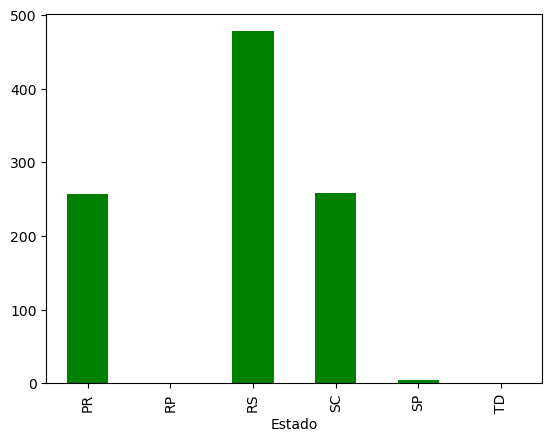

In [8]:
agrupado.plot.bar(color="green")

In [9]:
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot: xlabel='Genero'>

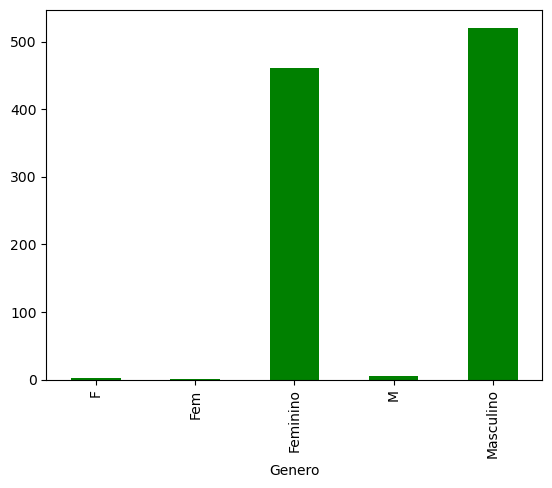

In [10]:
agrupado.plot.bar(color="green")

In [11]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

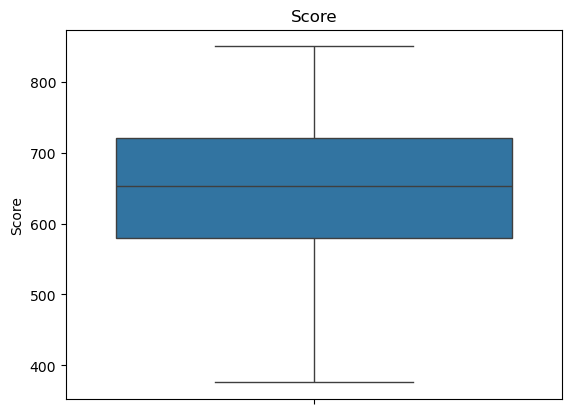

In [12]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

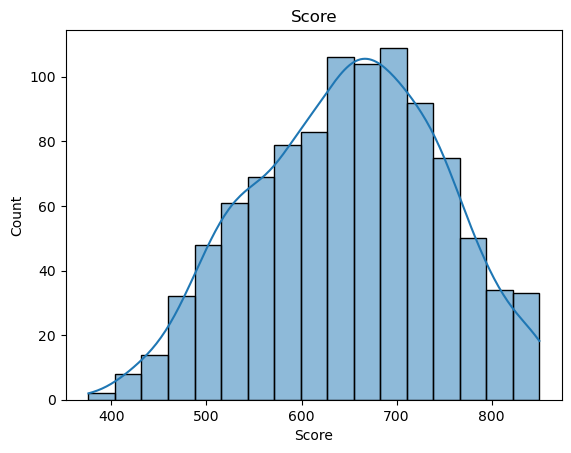

In [13]:
srn.histplot(dataset['Score'],kde=True).set_title('Score')

In [14]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

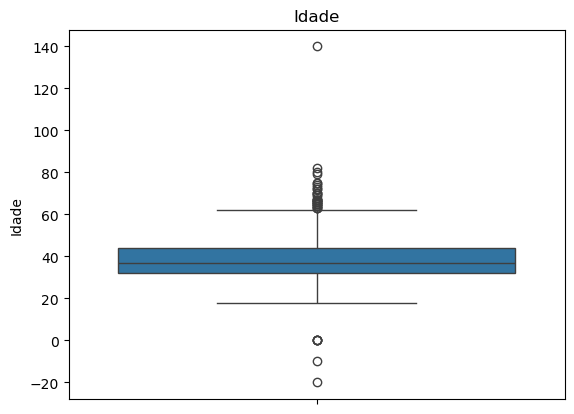

In [15]:
srn.boxplot(dataset['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

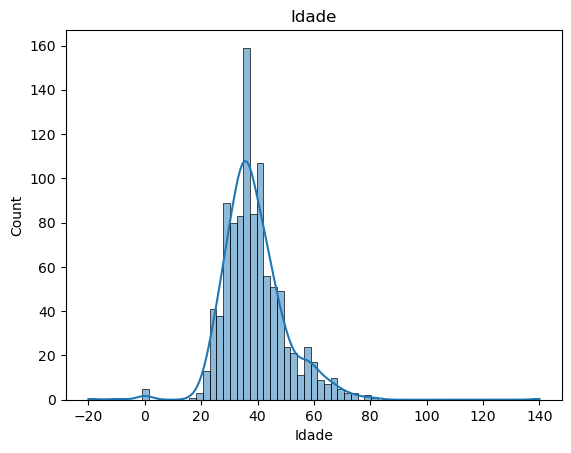

In [16]:
srn.histplot(dataset['Idade'],kde=True).set_title('Idade')

Campo Saldo

In [17]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'SALDO')

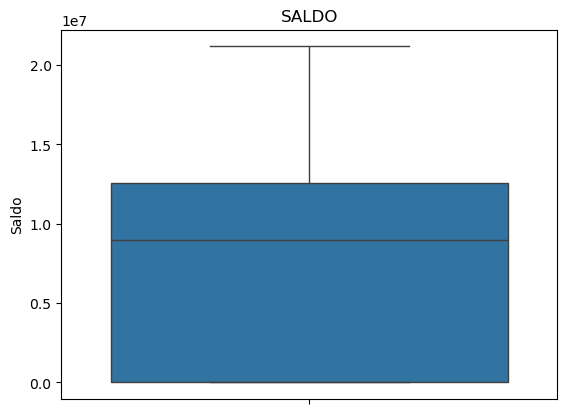

In [18]:
srn.boxplot(dataset['Saldo']).set_title('SALDO')

Text(0.5, 1.0, 'SALDO')

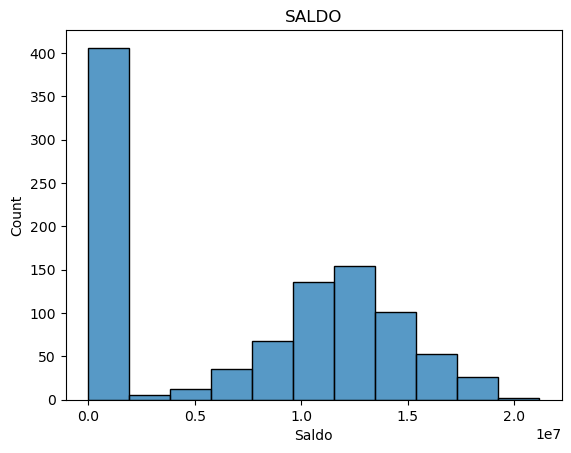

In [19]:
srn.histplot(dataset['Saldo']).set_title('SALDO')

In [20]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'SALARIO')

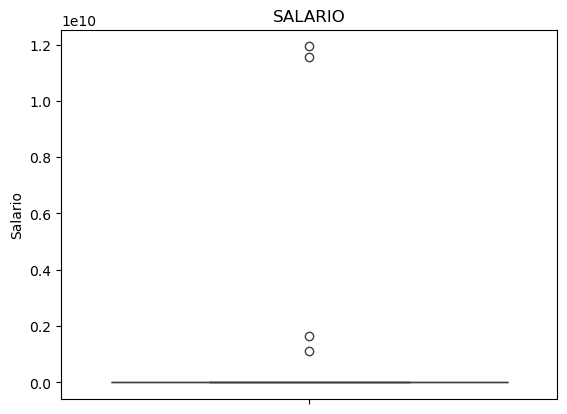

In [21]:
srn.boxplot(dataset['Salario']).set_title('SALARIO')

srn.histplot(dataset['Salario']).set_title('SALARIO')

In [22]:
dataset.isnull().sum()

ID               0
Score            0
Estado           0
Genero           8
Idade            0
Patrimonio       0
Saldo            0
Produtos         0
CartaoCredito    0
Ativo            0
Salario          7
Saiu             0
dtype: int64

<h1>TRATAMENTO DE DADOS

TRATAMENTO DO CAMPO SALARIO RELACIONADO A VALORES NULL

In [23]:
dataset['Salario'].isnull().sum()

7

In [24]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [25]:

dataset.fillna({'Salario':mediana},inplace=True)
mediana

70518.0

In [26]:
dataset['Salario'].isnull().sum()

0

In [27]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [28]:
dataset['Genero'].isnull().sum()

8

In [29]:
dataset.fillna({'Genero':'Masculino'},inplace=True)


In [30]:
dataset['Genero'].isnull().sum()

0

PADRONIZAÇÃO DE ACORDO COM O DOMINIO

In [31]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Femenino'

In [32]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Femenino       3
Feminino     461
Masculino    535
dtype: int64

IDADE ESTA FORA DO DOMINIO

In [33]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [34]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [35]:
desvio = sts.stdev(dataset['Salario'])
desvio

528724131.43461967

In [36]:
dataset.loc[dataset['Salario'] >= 2*desvio]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [37]:
mediana = sts.median(dataset['Salario'])
mediana


8641028.0

In [38]:
media = sts.mean(dataset['Salario'])
media

35040853.76876877

In [39]:
dataset.loc[dataset['Salario'] >= 2*desvio, 'Salario'] = mediana

In [40]:
dataset.loc[dataset['Salario'] >= 2*desvio]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartaoCredito,Ativo,Salario,Saiu


In [41]:
dataset[('Salario')].describe()

count    9.990000e+02
mean     8.790660e+06
std      6.068930e+06
min      9.677000e+03
25%      2.856485e+06
50%      8.641028e+06
75%      1.395180e+07
max      1.997254e+07
Name: Salario, dtype: float64